# Problem 3

NIM : 16520251

Nama : Rofif Fairuz Hawary

Sesi/Kelas : 3.1/D

Tanggal : 16 Desember 2020

Deskripsi : problem 3 praktikum modul 5

In [113]:
import pandas as pd
import matplotlib as plt

## Data Collecting

In [114]:
df = pd.read_csv("crypto.csv")

## Data Observation

#### 1. Line chart harga BTC setiap harinya, dengan nilai close sebagai nilai harian

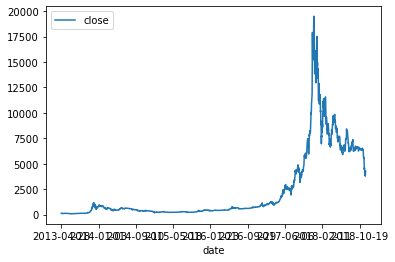

In [115]:
btc = df.loc[df["name"] == "BTC"] # memisahkan data btc ke tabel btc
btc.plot(kind="line", x="date", y="close")

#### 2. Scatter plot koin ETH, sumbu x = high, sumbu y = low

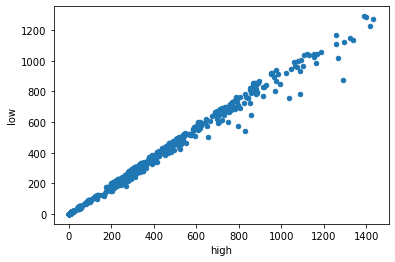

In [116]:
eth = df.loc[df["name"] == "ETH"] # memisahkan data ETH
eth.plot(kind="scatter", x="high", y="low")

#### 3. Pie chart banyaknya data masing-masing koin

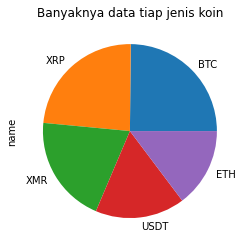

In [117]:
count_koin = df["name"].value_counts()
count_koin.plot(kind="pie", title="Banyaknya data tiap jenis koin")

#### 4. Pie chart nilai kapitalisasi pasar semua mata uang pada tanggal 4 Juli 2016

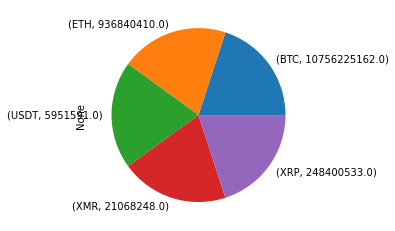

In [118]:
data_4_juli = df.loc[df["date"] == "2016-07-04"] # memisahakan data 4 juli 2016
data_4_juli.groupby(["name","market"]).size().plot(kind="pie")

#### 5. Membandingkan high tiap koin menggunakan line chart

memisahkan tiap komponen koin ke dalam tabel koin+highvalue masing masing

In [119]:
btc = df.loc[df["name"] == "BTC"] 
btc_ = btc.groupby(["high"], sort=False).size().reset_index()
xrp = df.loc[df["name"] == "XRP"] 
xrp_ = xrp.groupby(["high"], sort=False).size().reset_index()
xmr = df.loc[df["name"] == "XMR"] 
xmr_ = xmr.groupby(["high"], sort=False).size().reset_index()
usdt = df.loc[df["name"] == "USDT"] 
usdt_ = usdt.groupby(["high"], sort=False).size().reset_index()
eth = df.loc[df["name"] == "ETH"] 
eth_ = eth.groupby(["high"], sort=False).size().reset_index()

# untuk mengetahui ukuran masing masing groupby
print(len(btc_))
print(len(xrp_))
print(len(xmr_))
print(len(usdt_))
print(len(eth_))

2012
1822
1493
111
1089


meng-convert hasil groupby ke dalam list masing-masing, yang ukurannya sama besar, mengikuti ukuran list terbesar yaitu btc_ dengan ukuran 2012, karena agar time series dalam tabel yang akan di merge adalah sama

In [120]:
list_high_btc = [0 for i in range(2012)]
list_high_xrp = [0 for i in range(2012)]
list_high_xmr = [0 for i in range(2012)]
list_high_usdt = [0 for i in range(2012)]
list_high_eth = [0 for i in range(2012)]

#loops untuk memasukan data groupby masing2 ke dalam list masing2
for i in range(2012):
    list_high_btc[i] = btc_.at[i,"high"]
for i in range(1822):
    list_high_xrp[i+2012-1822] = xrp_.at[i,"high"]
for i in range(1493):
    list_high_xmr[i+2012-1493] = xmr_.at[i,"high"]
for i in range(111):
    list_high_usdt[i+2012-111] = usdt_.at[i,"high"]
for i in range(1089):
    list_high_eth[i+2012-1089] = eth_.at[i,"high"]

menggabungkan semua list menjadi sebuah tabel baru, dengan time series yang sama, meskipun attribute time series tidak diambil dalam merge ini

In [121]:
merge = pd.DataFrame({'btc':list_high_btc, 'xrp':list_high_xrp, 'xmr':list_high_xmr,'usdt':list_high_usdt,'eth':list_high_eth})

Hasil merge list, dalam indeks awal, ada nilai high yang 0, karena pada saat time series disitu, atribut koin tertentu belum memiliki nilai high values. Dalam artian setiap koin memiliki tanggal mulai yang berbeda dalam memiliki high value

In [122]:
merge

,btc,xrp,xmr,usdt,eth
0,135.98,0.000000,0.00,0.000000,0.00
1,147.49,0.000000,0.00,0.000000,0.00
2,146.93,0.000000,0.00,0.000000,0.00
3,139.89,0.000000,0.00,0.000000,0.00
4,125.60,0.000000,0.00,0.000000,0.00
...,...,...,...,...,...
2007,4120.87,0.386333,59.35,0.999798,118.88
2008,4107.14,0.388696,59.98,0.993022,118.20
2009,3862.96,0.367645,58.47,0.990603,111.84
2010,4385.90,0.401583,65.74,0.992572,126.05


Hasil perbandingan line chart berdasarkan time series hari ke-0 sampai hari ke-2012

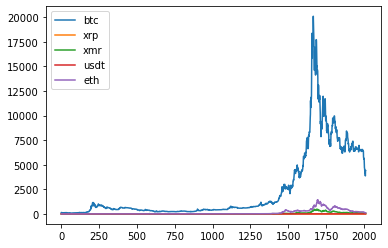

In [123]:
merge.plot(kind="line", y=["btc", "xrp", "xmr", "usdt", "eth"])